In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
import numpy as np
import os

data_path = os.path.join("..", "data", "Blood_fat.csv")
data = np.loadtxt(data_path, delimiter=",")

x1 = [x_row1[0] for x_row1 in data]
x2 = [x_row2[1] for x_row2 in data]
y_data = [y_row[2] for y_row in data]

In [4]:
a1 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
a2 = tf.Variable(tf.random_uniform([1], 0, 10, dtype = tf.float64, seed = 0))
b = tf.Variable(tf.random_uniform([1], 0, 100, dtype = tf.float64, seed = 0))

In [5]:
y = a1 * x1 + a2 * x2 + b

In [6]:
rmse = tf.sqrt(tf.reduce_mean(tf.square(y - y_data)))

In [7]:
learning_rate = 0.001

In [8]:
gradient_descent = tf.train.GradientDescentOptimizer(learning_rate).minimize(rmse)

In [9]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(2001):
        sess.run(gradient_descent)
        if step % 100 == 0:
            print("Epoch: %.f, RMSE = %.04f, 기울기 a1 = %.4f, 기울기 a2 = %.4f, y 절편 b = %.4f" % (step, sess.run(rmse), sess.run(a1), sess.run(a2), sess.run(b)))

Epoch: 0, RMSE = 643.9146, 기울기 a1 = 7.9995, 기울기 a2 = 8.0295, y 절편 b = 80.6891
Epoch: 100, RMSE = 51.0198, 기울기 a1 = 1.2999, 기울기 a2 = 4.2778, y 절편 b = 80.5946
Epoch: 200, RMSE = 42.6573, 기울기 a1 = 0.8654, 기울기 a2 = 4.3693, y 절편 b = 80.5900
Epoch: 300, RMSE = 42.1239, 기울기 a1 = 0.7509, 기울기 a2 = 4.5693, y 절편 b = 80.5895
Epoch: 400, RMSE = 41.8101, 기울기 a1 = 0.6632, 기울기 a2 = 4.7227, y 절편 b = 80.5890
Epoch: 500, RMSE = 41.6278, 기울기 a1 = 0.5962, 기울기 a2 = 4.8396, y 절편 b = 80.5887
Epoch: 600, RMSE = 41.5226, 기울기 a1 = 0.5454, 기울기 a2 = 4.9284, y 절편 b = 80.5883
Epoch: 700, RMSE = 41.4623, 기울기 a1 = 0.5069, 기울기 a2 = 4.9956, y 절편 b = 80.5880
Epoch: 800, RMSE = 41.4277, 기울기 a1 = 0.4778, 기울기 a2 = 5.0465, y 절편 b = 80.5878
Epoch: 900, RMSE = 41.4080, 기울기 a1 = 0.4558, 기울기 a2 = 5.0850, y 절편 b = 80.5875
Epoch: 1000, RMSE = 41.3967, 기울기 a1 = 0.4392, 기울기 a2 = 5.1141, y 절편 b = 80.5873
Epoch: 1100, RMSE = 41.3902, 기울기 a1 = 0.4266, 기울기 a2 = 5.1361, y 절편 b = 80.5871
Epoch: 1200, RMSE = 41.3865, 기울기 a1 = 0.4171, 기울기 a

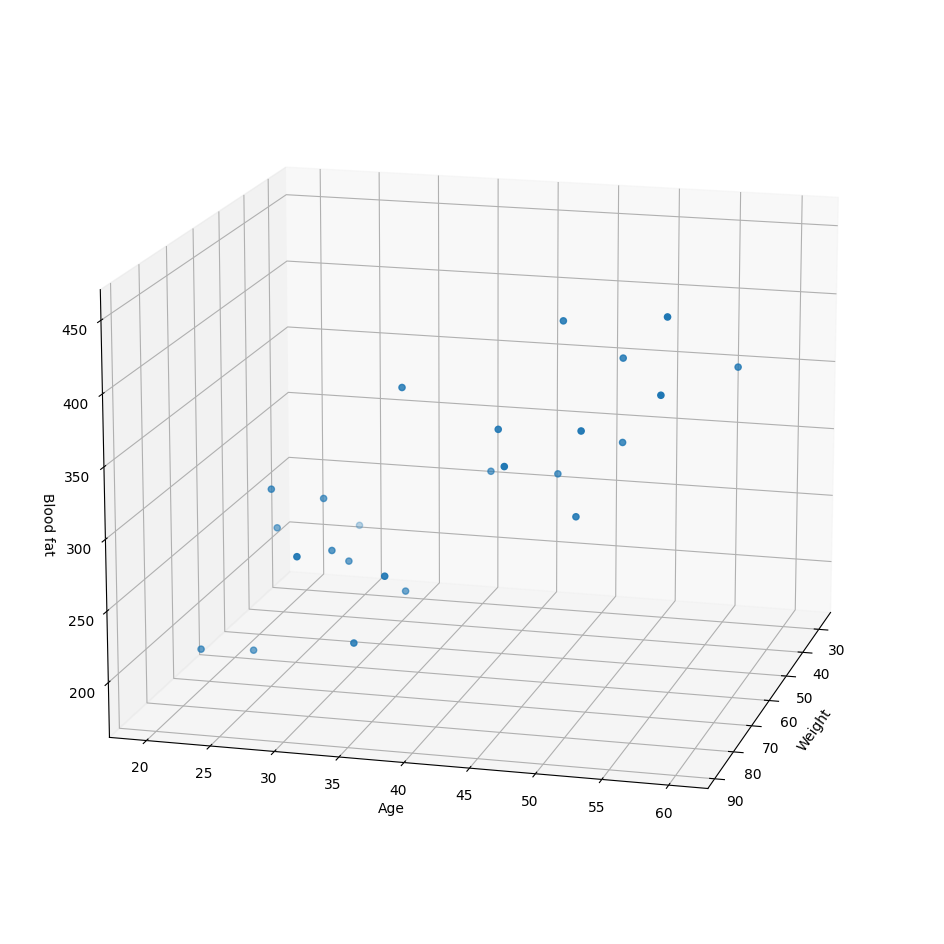

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(x1, x2, y_data)
ax.set_xlabel('Weight')
ax.set_ylabel('Age')
ax.set_zlabel('Blood fat')
ax.view_init(15, 15)
plt.show()